In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import tensorflow as tf
from keras.layers import Dense, Activation, Input, Dropout
from keras import Sequential

from sklearn.model_selection import train_test_split as tts, StratifiedKFold as skf

In [2]:
data = pd.read_csv('../data/ppm.csv')

X = data.Year
Y = data.PPM

In [3]:
Y.head()

0    315.98
1    316.91
2    317.64
3    318.45
4    318.99
Name: PPM, dtype: float64

In [19]:
model = Sequential(
    [
        # Input(shape=(47,)),
        Dense(units=4096, activation='relu', input_shape=(1,)),
        # Dense(units=4096, activation='relu'),
        Dense(units=2048, activation='relu'),
        Dense(units=1024, activation='relu'),
        Dense(units=512, activation='relu'),
        Dense(units=256, activation='relu'),
        Dense(units=128, activation='relu'),
        Dense(units=64, activation='relu'),
        Dense(units=32, activation='relu'),
        Dense(units=16, activation='relu'),
        Dense(units=8, activation='relu'),
        Dense(units=4, activation='relu'),
        Dense(units=1, activation='relu'),
    ]
)

model.compile(optimizer='Adagrad', loss='mae', metrics=['mae'])
X_train, X_test, Y_train, Y_test = tts(X, Y)

history = model.fit(
    x=X_train,
    y=Y_train,
    validation_data=(X_test, Y_test),
    batch_size=3,
    epochs=200
)

Epoch 1/200
16/16 [==============================] - 1s 25ms/step - loss: 157.3365 - mae: 157.3365 - val_loss: 145.1297 - val_mae: 145.1297
Epoch 2/200
16/16 [==============================] - 0s 5ms/step - loss: 61.9795 - mae: 61.9795 - val_loss: 22.8533 - val_mae: 22.8533
Epoch 3/200
16/16 [==============================] - 0s 5ms/step - loss: 31.2787 - mae: 31.2787 - val_loss: 84.8051 - val_mae: 84.8051
Epoch 4/200
16/16 [==============================] - 0s 5ms/step - loss: 47.7359 - mae: 47.7359 - val_loss: 21.1427 - val_mae: 21.1427
Epoch 5/200
16/16 [==============================] - 0s 5ms/step - loss: 28.6845 - mae: 28.6845 - val_loss: 22.6856 - val_mae: 22.6856
Epoch 6/200
16/16 [==============================] - 0s 5ms/step - loss: 29.7724 - mae: 29.7724 - val_loss: 35.6264 - val_mae: 35.6264
Epoch 7/200
16/16 [==============================] - 0s 5ms/step - loss: 36.3079 - mae: 36.3079 - val_loss: 56.6987 - val_mae: 56.6987
Epoch 8/200
16/16 [==============================]

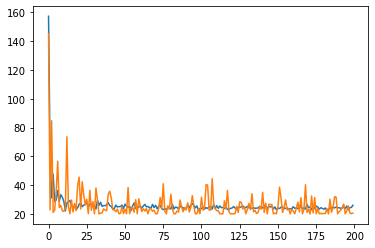

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [22]:
min(history.history['val_loss'])

20.106605529785156